**Logistic Regression**


**Step1: Data loading and preparing**

In [1]:
from sklearn.datasets import load_digits
import numpy as np

X_train, X_test, y_train, y_test = np.load('digitspreprocess.npy', allow_pickle=True)
y_train_mat =np.mat(y_train).T
y_test_mat = np.mat(y_test).T
X_train = np.mat(np.c_[np.ones((X_train.shape[0],1)), X_train]) #add constant
X_test = np.mat(np.c_[np.ones((X_test.shape[0],1)), X_test])
print(y_train_mat.shape)

(860, 1)


**Step 2: Gradient Descent**

In [2]:
def gradientDescent(learningRate, lema, maxInter, epsilon):
    W = np.mat(np.random.randn(65,1)) #initial w
    lostList = []
    for i in range(maxInter):
        H = 1/(1 + np.exp(-X_train * W))
        dw = (1/X_train.shape[0]) * X_train.T * (H - y_train_mat) + lema * W
        if(np.linalg.norm(dw, ord = 2) < epsilon): 
            print("Terminate Norm", np.linalg.norm(dw, ord = 2))
            break
        else:
            lost = (1/X_train.shape[0]) * (np.log(1 + np.exp(-X_train * W)).T @ y_train_mat + (1- y_train_mat).T @ np.log(1 + np.exp(X_train * W))) +  np.linalg.norm(W, ord = 2)
            lostList.append(lost[0,0])
            W -= learningRate * dw
            
    print("Terminate dw: ", np.linalg.norm(dw))  
    print("Terminate iteration", i)        
    return W,lostList

Terminate dw:  0.025805669697555367
Terminate iteration 9999


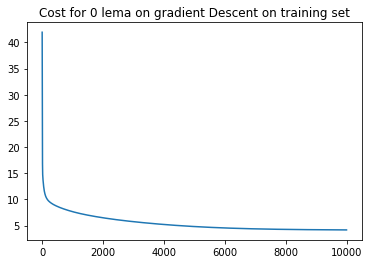

In [3]:
#lema = 0
W_0, lostList_0 = gradientDescent(learningRate = 0.005, lema = 0, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0 lema on gradient Descent on training set')
plt.plot(lostList_0)

Terminate dw:  0.04611417191199701
Terminate iteration 9999


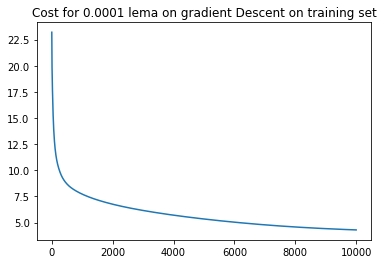

In [4]:
#lema = 0.0001
W_0001, lostList_0001 = gradientDescent(learningRate = 0.005, lema = 0.0001, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.0001 lema on gradient Descent on training set')
plt.plot(lostList_0001)

Terminate dw:  0.02406438373355241
Terminate iteration 9999


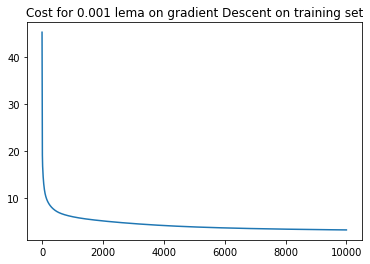

In [5]:
#lema = 0.001
W_001, lostList_001 = gradientDescent(learningRate = 0.005, lema = 0.001, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.001 lema on gradient Descent on training set')
plt.plot(lostList_001)

Terminate dw:  0.04913847166792695
Terminate iteration 9999


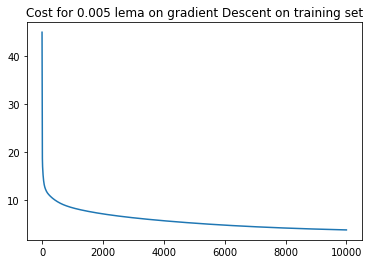

In [6]:
#lema = 0.005
W_005, lostList_005 = gradientDescent(learningRate = 0.005, lema = 0.005, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.005 lema on gradient Descent on training set')
plt.plot(lostList_005)

Terminate dw:  0.024272441224908466
Terminate iteration 9999


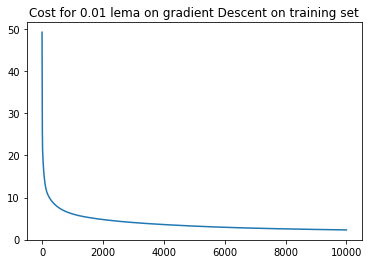

In [7]:
#lema = 0.01
W_01, lostList_01 = gradientDescent(learningRate = 0.005, lema = 0.01, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.01 lema on gradient Descent on training set')
plt.plot(lostList_01)

Terminate dw:  0.019743131698385895
Terminate iteration 9999


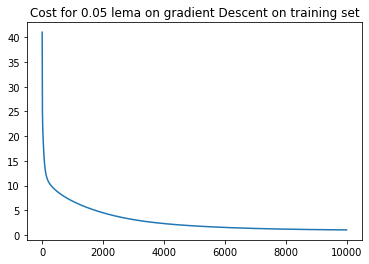

In [8]:
#lema = 0.05
W_05, lostList_05 = gradientDescent(learningRate = 0.005, lema = 0.05, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.05 lema on gradient Descent on training set')
plt.plot(lostList_05)

Terminate dw:  0.002878495226573979
Terminate iteration 9999


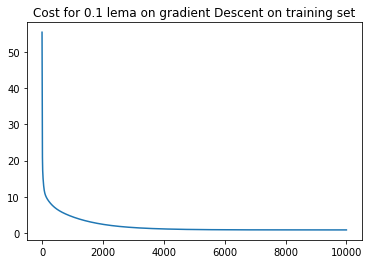

In [9]:
# lema = 0.1
W_0_1, lostList_0_1 = gradientDescent(learningRate = 0.005, lema = 0.1, maxInter = 10000, epsilon = 0.00001)
#Figure of lost function
import matplotlib.pyplot as plt
plt.title('Cost for 0.1 lema on gradient Descent on training set')
plt.plot(lostList_0_1)

**Step 3: Predict Model**

In [10]:
def predict(W, X):
    m = X.shape[0]
    Y_prediction = np.mat(np.zeros((m,1)))
    A = np.mat(1/(1 + np.exp(-X @ W)))
    for i in range(m):
        if A[i,0]>0.5:
            Y_prediction[i,0] = 1
        else:
            Y_prediction[i,0] = 0

    return Y_prediction

predicted_test_0_1 = predict(W_0_1, X_test)

**Step 4: Error Rate**

In [11]:
#lema = 0
predicted_test_0 = predict(W_0, X_test)
testBoolean_0 = np.array(predicted_test_0 == y_test_mat)
print(np.count_nonzero(testBoolean_0 == 1)/ testBoolean_0.shape[0])

0.883177570093458


In [12]:
#lema = 0.0001
predicted_test_0001 = predict(W_0001, X_test)
testBoolean_0001 = np.array(predicted_test_0001 == y_test_mat)
print(np.count_nonzero(testBoolean_0001 == 1)/ testBoolean_0001.shape[0])

0.8691588785046729


In [13]:
#lema = 0.001
predicted_test_001 = predict(W_001, X_test)
testBoolean_001 = np.array(predicted_test_001 == y_test_mat)
print(np.count_nonzero(testBoolean_001 == 1)/ testBoolean_001.shape[0])

0.8878504672897196


In [14]:
#lema = 0.005
predicted_test_005 = predict(W_005, X_test)
testBoolean_005 = np.array(predicted_test_005 == y_test_mat)
print(np.count_nonzero(testBoolean_005 == 1)/ testBoolean_005.shape[0])

0.883177570093458


In [15]:
#lema = 0.01
predicted_test_01 = predict(W_01, X_test)
testBoolean_01 = np.array(predicted_test_01 == y_test_mat)
print(np.count_nonzero(testBoolean_01 == 1)/ testBoolean_01.shape[0])

0.897196261682243


In [16]:
#lema = 0.05
predicted_test_05 = predict(W_05, X_test)
testBoolean_05 = np.array(predicted_test_05 == y_test_mat)
print(np.count_nonzero(testBoolean_05 == 1)/ testBoolean_05.shape[0])

0.897196261682243


In [17]:
#lema = 0.1
testBoolean_0_1 = np.array(predicted_test_0_1 == y_test_mat)
print(np.count_nonzero(testBoolean_0_1 == 1)/ testBoolean_0_1.shape[0])

0.9018691588785047
